<a href="https://colab.research.google.com/github/syuhraputri27/syuhraputri27/blob/main/507327_SkictLearnIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scikt-learn untuk IRIS**

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy
iris = datasets.load_iris()
X = iris.data
y = iris.target

Load Data

In [ ]:
dataset = pd.DataFrame(data=numpy.c_[iris['data']],
                           columns=iris['feature_names'])

dataset['class'] = numpy.c_[list(map((lambda x : iris.target_names[x]), iris.target))]

print(dataset.shape)

print(dataset.head(5))

(150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    class  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = .10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.2)
print('X_train',X_train.shape)
print('X_val',X_val.shape)
print('X_test',X_test.shape)

X_train (108, 4)
X_val (27, 4)
X_test (15, 4)


Define and Compile Model

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', max_iter= 800)

Fit Model and Evaluation Model

In [ ]:
from sklearn.metrics import accuracy_score

mlp.fit(X_train, Y_train)
prediksi_val = mlp.predict(X_val)
acc_val = accuracy_score(Y_val, prediksi_val)
print('Akurasi Validasi Training ANN', acc_val)

Akurasi Validasi Training ANN 0.9629629629629629


Prediction

Akurasi Testing ANN: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


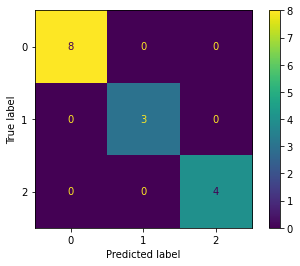

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

prediksi_test = mlp.predict(X_test)
acc_test = accuracy_score(Y_test, prediksi_test)
print('Akurasi Testing ANN:', acc_test)
plot_confusion_matrix(mlp, X_test, Y_test)